## Word Cloud Analysis In Python

### The Analysis Objectives:

The primary objective of conducting a word cloud analysis is to visually represent the frequency or importance of words within a text dataset. Here are some key purposes and benefits of using word clouds:

1. `Highlighting Key Words and Themes:` Word clouds make the most frequently used words in a text dataset stand out. This helps in quickly identifying dominant themes or topics.
2. `Data Exploration and Preliminary Analysis:` They are often used in the initial stages of text analysis to get a general sense of the data, which can guide more detailed analyses later.
3. `Simplifying Presentation of Text Data:` Word clouds can transform complex textual data into an easy-to-understand visual format, making it accessible to a broader audience, including those not specialized in data analysis.
4. `Engagement and Aesthetic Appeal:` Visually appealing, word clouds can engage viewers and are often used in presentations, reports, and infographics to summarize textual data in an attractive manner.
5. `Identifying Trends and Patterns:` In datasets like social media feeds or customer feedback, word clouds can help in spotting current trends, prevalent opinions, or common issues raised by users.
6. `Supplementary Tool:` Word clouds are often used as a supplementary tool in conjunction with more sophisticated text analysis methods, like sentiment analysis, topic modeling, or natural language processing (NLP) techniques.

It's important to note that while word clouds provide an easy and quick way to get insights from text data, they are generally considered a starting point for analysis rather than an end in themselves. They lack the depth and context provided by more advanced analytical methods.

### The Dataset:

The PyCaret "tweets" dataset contains two columns:

1. `id:` This column likely represents a unique identifier for each tweet. Each entry in this column is a numerical value.
2. `tweet:` This column contains the text of the tweets. Each entry is a string that represents the content of a tweet.

The dataset has a total of 8,594 entries, and there are no null values in either of the columns. This structure suggests that the dataset is primarily used for text analysis or natural language processing tasks, where the 'tweet' column would be the main focus for analysis, sentiment analysis, language modeling, etc. The 'id' column can be used to uniquely identify each tweet, which is useful for indexing or merging with other datasets.

### Text Processing:

The dataset only contains the raw tweets and their corresponding unique identifiers. This type of dataset is often referred to as a "raw" or "uncleaned" dataset, as it has not yet been preprocessed for sentiment analysis.

To perform sentiment and other types of analysis on this dataset, you would need to preprocess it by performing tasks such as:

1. `Tokenization:` Splitting the tweets into individual words or phrases.
2. `Normalization:` Converting all words or phrases to lowercase and removing punctuation.
3. `Stemming or lemmatization:` Reducing words to their root forms to group similar words together.
4. `Removing stop words:` Removing common words that don't add much meaning to the sentiment, such as "the," "a," and "an."

### Step 1: Install Necessary Libraries:
Ensure you have PyCaret, WordCloud, and other necessary libraries installed:

In [101]:
# !pip install wordcloud
# !pip install pillow
# !pip install --upgrade gspread
# !pip install pycaret

### Step 2: Load Libraries
These are some of the Python packages you need to execute the other commands below:

In [102]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pycaret.datasets import get_data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
from IPython.display import FileLink

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step 3: Load the Dataset:
Use PyCaret to load the 'tweets' dataset.

In [103]:
df = get_data('tweets')

,id,tweet
0,2602860537,10 Things Missing In The New Twitter Interface...
1,2602850443,RT @_NATURALBWINNER OH AND I DONT LIKE THIS #N...
2,2602761852,RT @HBO24 yo the #newtwitter is better.. YUPP ...
3,2602738438,Aaaaaaaand I have the new twitter! Yay! I shou...
4,2602684185,can I please have the new twitter? #twitter #n...


### Step 4: Initial EDA:
Perform some basic exploratory data analysis to understand the dataset:

In [104]:
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8594 non-null   int64 
 1   tweet   8594 non-null   object
dtypes: int64(1), object(1)
memory usage: 134.4+ KB


In [105]:
# Summary statistics
print(df.describe())

                 id
count  8.594000e+03
mean   2.682053e+09
std    3.175977e+07
min    2.602292e+09
25%    2.658713e+09
50%    2.697121e+09
75%    2.707505e+09
max    2.719124e+09


In [106]:
# Checking for missing values
print(df.isnull().sum())

id       0
tweet    0
dtype: int64


In [107]:
# Distribution of target variable (if applicable)
if 'target' in df.columns:
    sns.countplot(x='target', data=df)
    plt.show()

### Step 5: Data Preprocessing:
Preprocess the text data to improve the quality of the word cloud:

In [108]:
# Function to clean and preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Removing punctuation and non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]

    return " ".join(tokens)

# Apply preprocessing to each tweet
df['cleaned_text'] = df['tweet'].apply(preprocess_text)

### Step 5: Generate the Word Cloud:
Combine all tweets into a single text and use the WordCloud library to generate the word cloud.

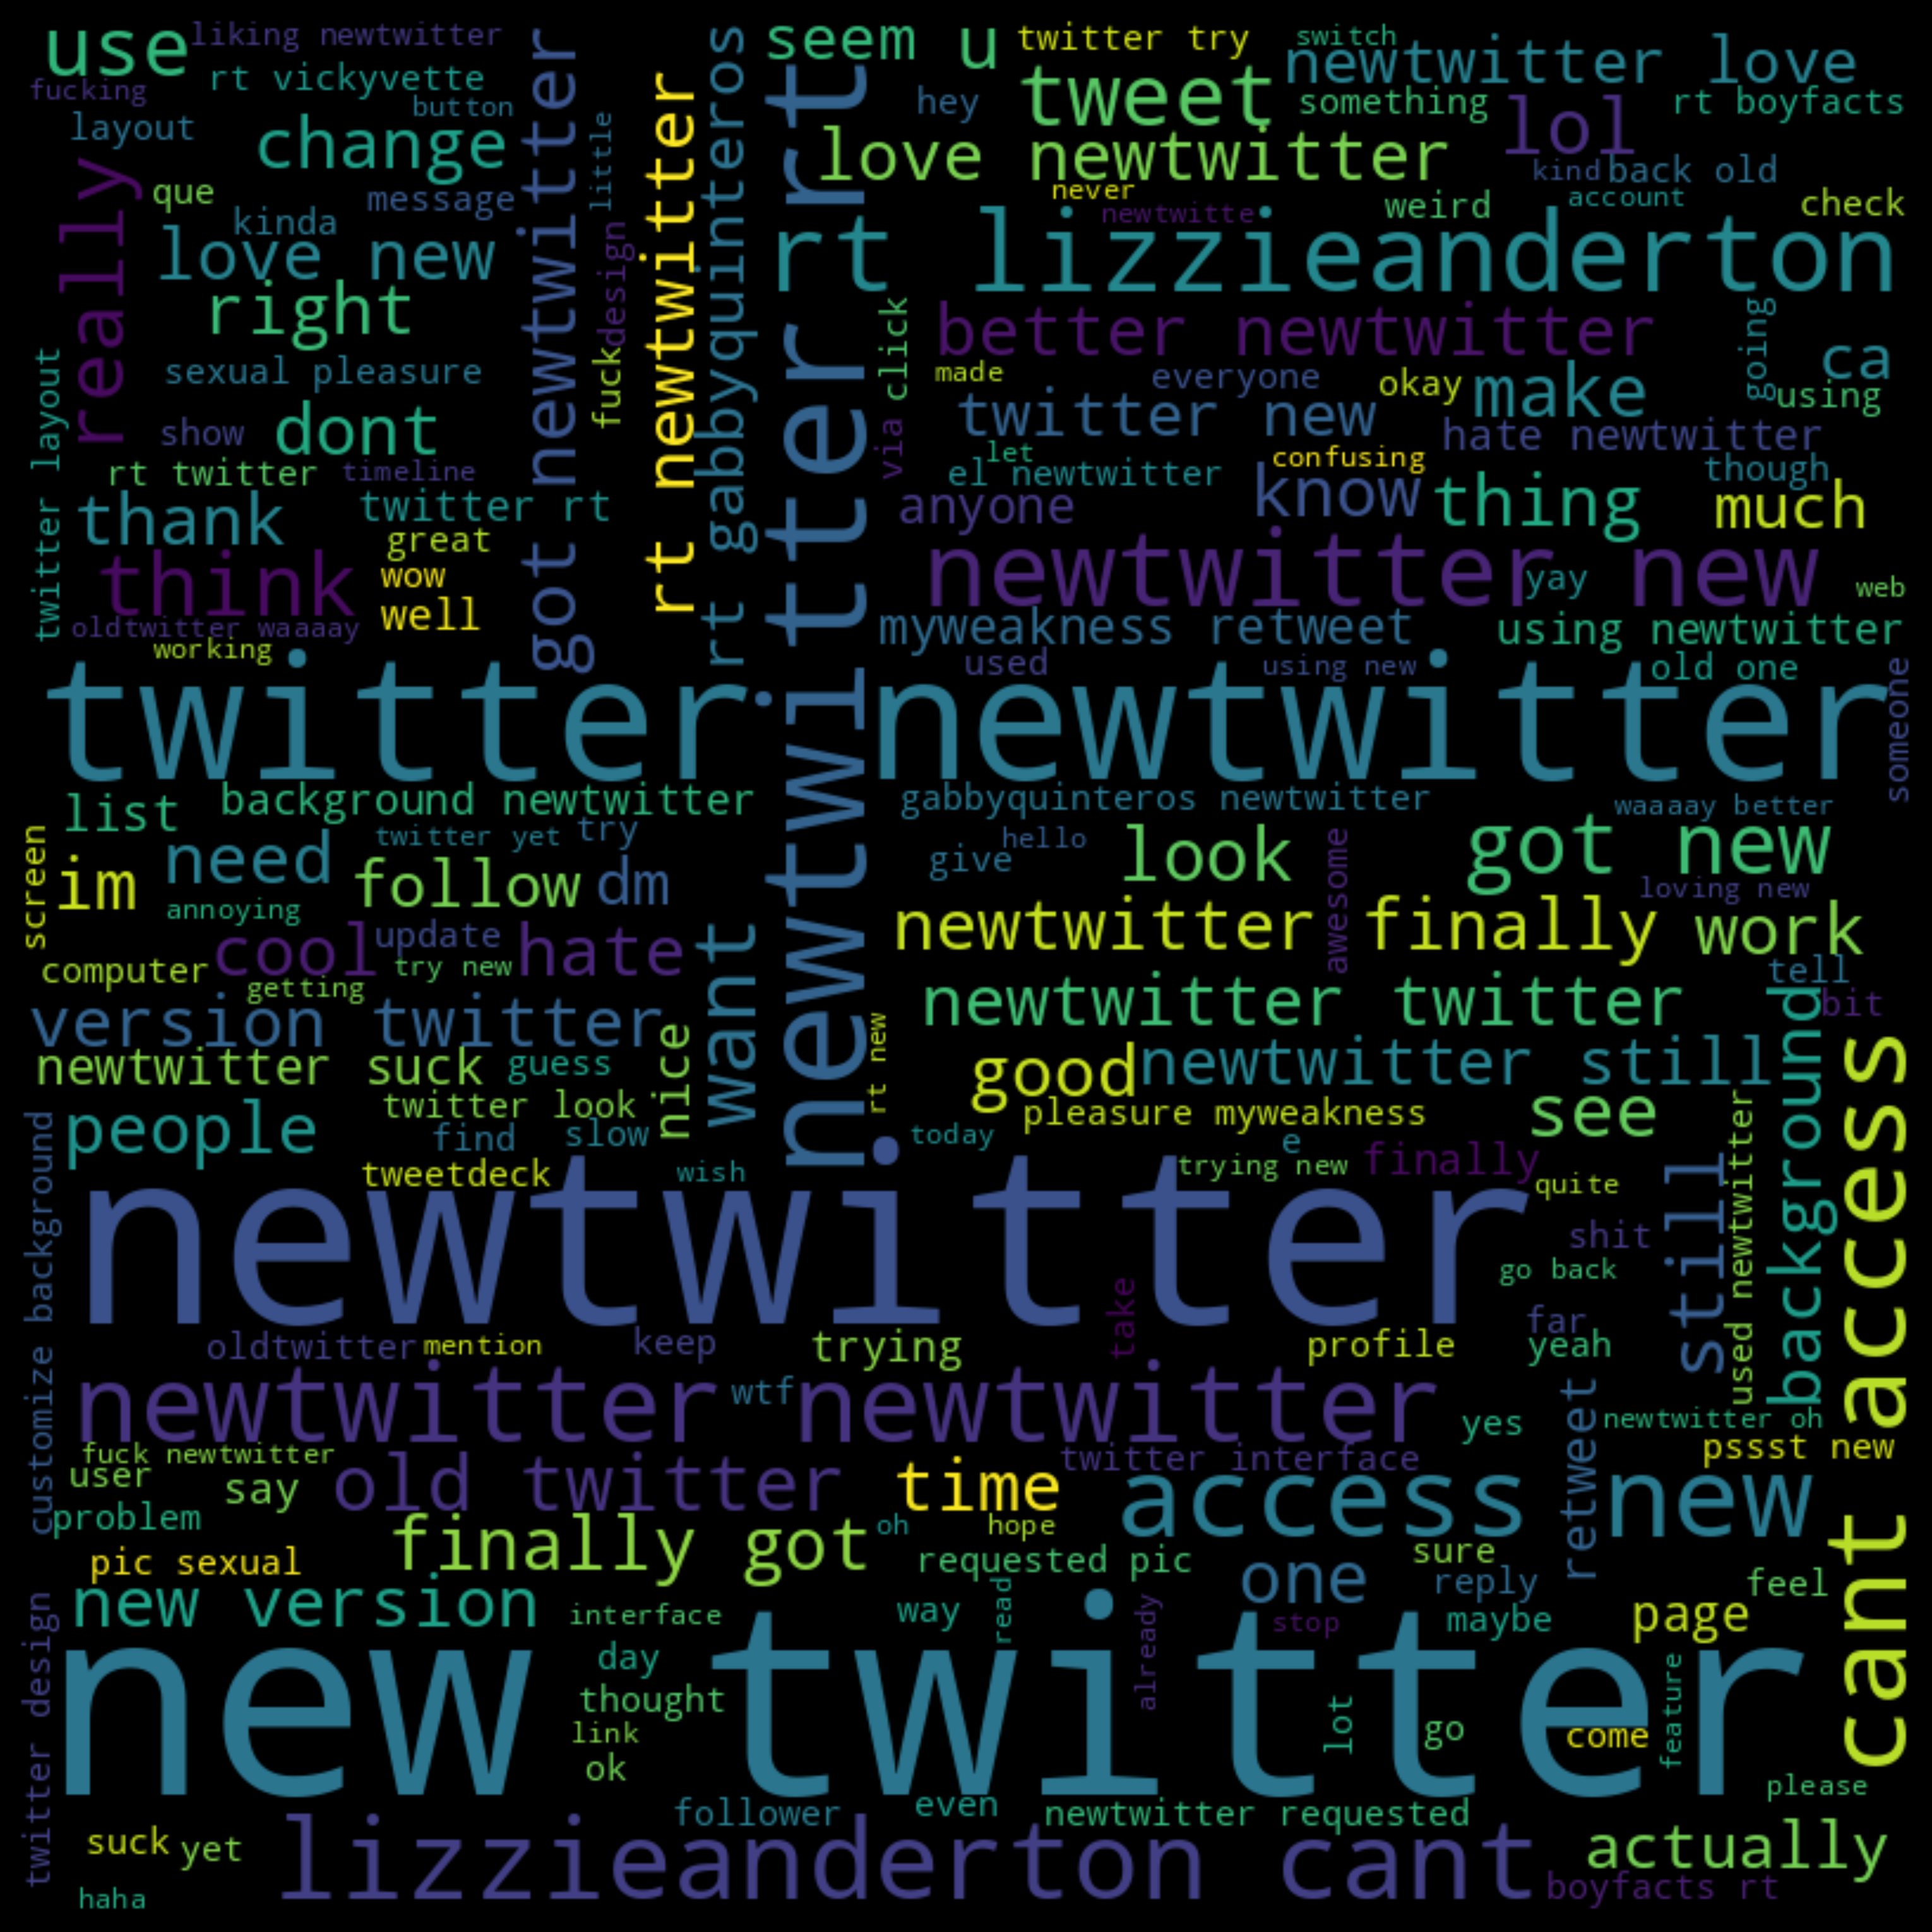

In [109]:
# Combining all cleaned tweets into a single text
all_cleaned_tweets = " ".join(tweet for tweet in df['cleaned_text'])

# Generating a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(all_cleaned_tweets)

# Plotting the word cloud
plt.figure(figsize=(10, 10), facecolor = 'black')
plt.imshow(wordcloud, interpolation="bilinear")
plt.rcParams['figure.dpi'] = 300 # 200 e.g. is really fine, but slower
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Conclusion and Key Takeaways:

The word cloud generated from the "tweets" dataset visually highlights the most frequently occurring words in the tweets. Here are some key takeaways:

1. `Prominent Themes:` The larger words in the word cloud represent the most common themes or topics in the dataset. These prominent words can indicate the general sentiment or subject matter prevalent in the tweets.
2. `Understanding Context:` While the word cloud provides a quick glimpse into common words, it lacks context. For instance, words may appear significant, but without understanding their usage in sentences, the true sentiment or intent behind the tweets cannot be fully grasped.
3. `Potential Applications:` This word cloud can be a starting point for more detailed text analysis, such as sentiment analysis, topic modeling, or trend analysis. It helps in identifying keywords that might warrant further investigation.
4. `Limitations:` The word cloud does not differentiate between positive and negative connotations of words. Also, common but unimportant words (like prepositions or conjunctions) might appear prominent unless filtered out.

Overall, the word cloud offers a visual summary of the dataset, providing an immediate sense of the most talked-about topics. However, for deeper insights, further analytical steps, such as preprocessing (e.g., removing stopwords, stemming) and advanced NLP techniques, are necessary.